In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Set the directory path
os.chdir('G:\\Meu Drive\\Freelancing & Entrevistas\\Workana_LendingOne')
path = os.getcwd()

In [12]:
# Load the merged dataset
merged_data = pd.read_csv(path + "\\data\\merged_table.csv")

# Analysis of Merged Data

## 1. Introduction
This analysis aims to identify trends and patterns in the merged transaction data, focusing on key metrics such as transaction amounts, spending over time, and top customers.

## 2. Data Overview
- The dataset contains 10 records with the following columns: `transaction_id`, `customer_name`, `match_name`, `amount`, `transaction_date`, and `email`.
- Initial exploration shows that there are no missing values in critical fields.

In [13]:
# Display the first few rows of the dataset
merged_data.head()

,transaction_id,customer_name,match_name,amount,transaction_date,email
0,101,John Smith,John Smith,784,2023-01-31,john.smith@email.com
1,102,Jane Doe,Jane Doe,659,2023-02-28,jane.doe@email.com
2,103,Michael Jonson,Micheal Jonson,729,2023-03-31,m.johnson@email.com
3,104,Chris Lee,Chris Lee,292,2023-04-30,c.lee@email.com
4,105,Katherine Davis,Katherine Davis,935,2023-05-31,k.davis@email.com
5,106,David Martinez,David Martinez,863,2023-06-30,d.martinez@email.com
6,107,Sarah Brown,Sara Brownn,807,2023-07-31,s.brown@email.com
7,108,James Wilson,James Wilson,459,2023-08-31,j.wilson@email.com
8,109,Patricia Taylor,Patricia Taylor,109,2023-09-30,p.taylor@email.com
9,110,Robet Miller,Robert Miller,823,2023-10-31,r.miller@email.com


In [17]:
# Display basic information about the dataset
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    10 non-null     int64 
 1   customer_name     10 non-null     object
 2   match_name        10 non-null     object
 3   amount            10 non-null     int64 
 4   transaction_date  10 non-null     object
 5   email             10 non-null     object
dtypes: int64(2), object(4)
memory usage: 612.0+ bytes


In [18]:
# Check for missing values
merged_data.isnull().sum()

transaction_id      0
customer_name       0
match_name          0
amount              0
transaction_date    0
email               0
dtype: int64

In [19]:
# Summary statistics
merged_data.describe()

,transaction_id,amount
count,10.00000,10.000000
mean,105.50000,646.000000
std,3.02765,271.337428
min,101.00000,109.000000
25%,103.25000,509.000000
50%,105.50000,756.500000
75%,107.75000,819.000000
max,110.00000,935.000000


## 3. Transaction Amounts Distribution
- The distribution of transaction amounts is right-skewed, with the majority of transactions falling below $819, according to the 75th percentile:

Median: 756.5, Mean: 646.0, 75th Percentile: 819.0


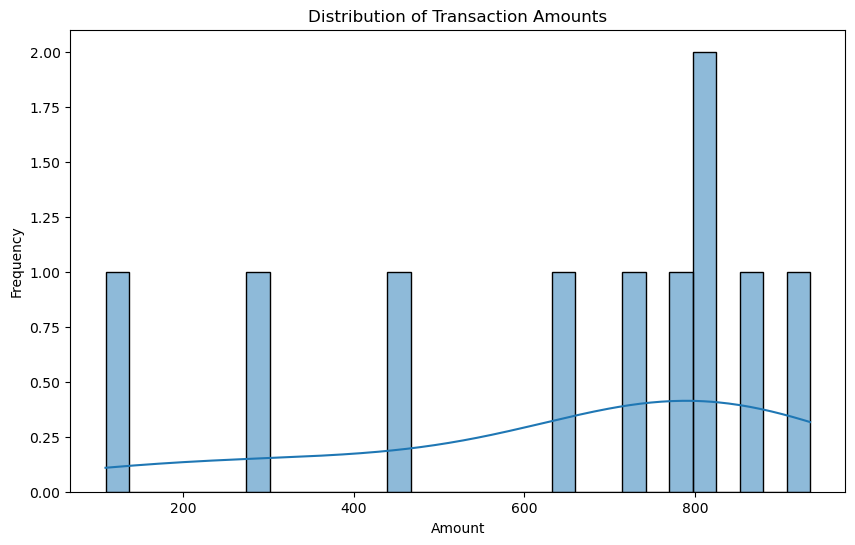

In [24]:
# Calculate the median, mean, and 75th percentile of transaction amounts
median_amount = merged_data['amount'].median()
mean_amount = merged_data['amount'].mean()
percentile_75 = merged_data['amount'].quantile(0.75)

print(f"Median: {median_amount}, Mean: {mean_amount}, 75th Percentile: {percentile_75}")

# Visualize Transaction Amounts

## Plot the distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


## 4. Spending Trends Over Time
- There is a noticeable increase in spending during May 2023 to mid August 2023. This could be due to factors like vacation season. Another spike can be noticed in October 2023 to possibly November 2023, likely due to Black Fiday, but without much information, it can only be speculated:

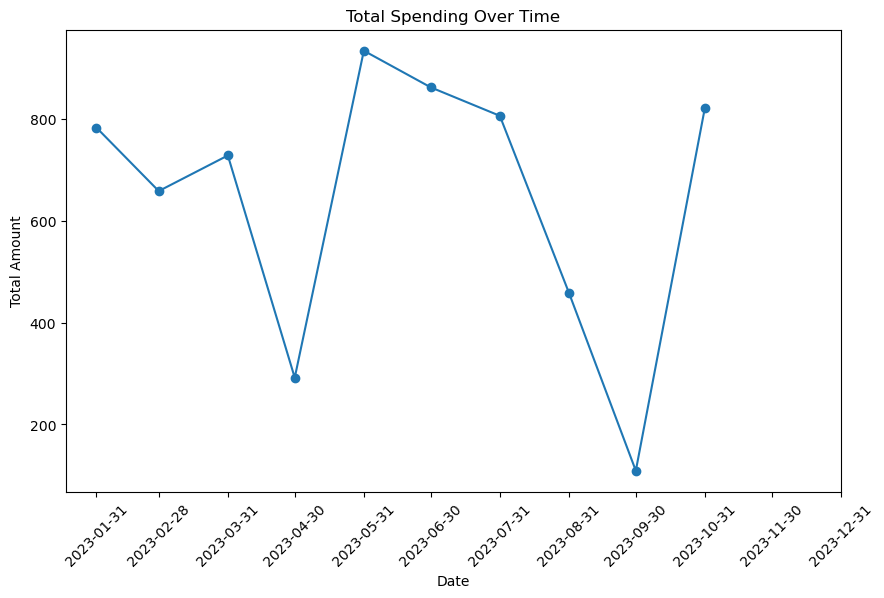

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_data is your DataFrame and it's already loaded
merged_data['transaction_date'] = pd.to_datetime(merged_data['transaction_date'])

# Ensure the date range includes January
full_date_range = pd.DataFrame({'transaction_date': pd.date_range(start='2023-01-01', 
                                                                  end=merged_data['transaction_date'].max(), 
                                                                  freq='M')})

# Aggregate spending over time
spending_over_time = merged_data.groupby('transaction_date')['amount'].sum().reset_index()

# Merge to ensure every month is covered, even if there's no data
full_spending = pd.merge(full_date_range, spending_over_time, on='transaction_date', how='left').fillna(0)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(full_spending['transaction_date'], full_spending['amount'], marker='o')

# Set the x-ticks to start in January and show each month
plt.xticks(pd.date_range(start='2023-01-01', end='2023-12-31', freq='M'), rotation=45)

# Set the axis labels and title
plt.title('Total Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')

plt.show()


## 5. Top Customers
- The top 10 customers account for a significant portion of total spending.
- The top customer is Katherine Davis, with a total spending of $935.

Top Costumer: Katherine Davis, Total Amoun Spent: 935


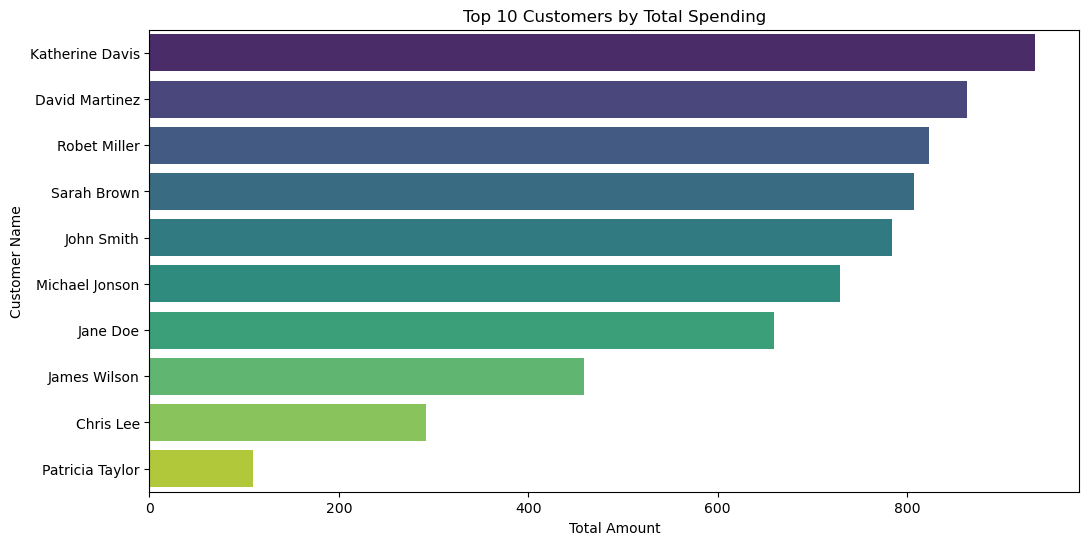

In [27]:
# Top Customers by Total Spending

## Calculate total spending per customer
top_customers = merged_data.groupby('customer_name')['amount'].sum().reset_index()

## Sort the customers by spending
top_customers = top_customers.sort_values(by='amount', ascending=False).head(10)

# Identify the top customer
top_customer = top_customers.iloc[0]

# Extract the name and total spending
top_customer_name = top_customer['customer_name']
top_customer_spending = top_customer['amount']
print(f"Top Costumer: {top_customer_name}, Total Amoun Spent: {top_customer_spending}")

## Plot the top customers
plt.figure(figsize=(12, 6))
sns.barplot(data=top_customers, x='amount', y='customer_name', palette='viridis')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Total Amount')
plt.ylabel('Customer Name')
plt.show()


## 6. Conclusions

- Based on the analysis, key trends indicate that the majority of transactions are relatively small, but a few high-value transactions significantly contribute to overall revenue. There is a noticeable spike in spending durinOctober 2023 to possibly November 202323, likely driven by Black Friday promotions. The top 10 customers, especially Katherine Davis, who spent $935, account for a significant portion of total revenue.

- Further investigation could explore customer segmentation to better understand the different spending patterns among various customer groups. Additionally, analyzing seasonal trends in more detail could provide insights into how external factors, such as holidays or promotional events, impact spending. Product-level analysis could identify which products are most popular among top customers, helping to guide inventory and marketing strategies. Finally, customer retention strategies should be developed to maintain and grow the relationships with high-value customers like Katherine Davis.

